In [1]:
## DATA ingestion
from langchain_community.document_loaders import TextLoader 
text_loader = TextLoader('speech.txt', encoding='charmap')
text_documents = text_loader.load()
text_documents

[Document(metadata={'source': 'speech.txt'}, page_content='â\x80\x9cIf, I say, for I would not impress by declamation when Reason offers her sober light, if they be really capable of acting like rational creatures, let them not be treated like slaves; or, like the brutes who are dependent on the reason of man, when they associate with him; but cultivate their minds, give them the salutary, sublime curb of principle, and let them attain conscious dignity by feeling themselves only dependent on God. Teach them, in common with man, to submit to necessity, instead of giving, to render them more pleasing, a sex to morals.\n\nFurther, should experience prove that they cannot attain the same degree of strength of mind, perseverance, and fortitude, let their virtues be the same in kind, though they may vainly struggle for the same degree; and the superiority of man will be equally clear, if not clearer; and truth, as it is a simple principle, which admits of no modification, would be common to

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

groq_api_key = os.getenv('GROQ_API_KEY')

if groq_api_key is not None:
	os.environ['GROQ_API_KEY'] = groq_api_key
else:
	raise ValueError("GROQ_API_KEY is not set in the environment variables.")

huggingface_api_key = os.getenv('HUGGINGFACE_API_KEY')

In [3]:
# WEB BASED LOADER
from langchain_community.document_loaders import WebBaseLoader
from bs4 import SoupStrainer  # Correct import

# load, chunk and index the content of the html page
loader = WebBaseLoader(
    web_path="https://www.perplexity.ai/hub/blog/accelerating-sonar-through-speculation",
    bs_kwargs=dict(parse_only=SoupStrainer(
        class_=("post-title", "post_content", "post_header")
    ))
)


text_documents=loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [4]:
text_documents

[Document(metadata={'source': 'https://www.perplexity.ai/hub/blog/accelerating-sonar-through-speculation'}, page_content='')]

In [5]:
# data ingestion from pdf
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader('2502.15840v1.pdf')
docs=loader.load()


In [6]:
docs

[Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-02-25T01:04:48+00:00', 'author': '', 'keywords': '', 'moddate': '2025-02-25T01:04:48+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': '2502.15840v1.pdf', 'total_pages': 28, 'page': 0, 'page_label': '1'}, page_content='Vending-Bench: A Benchmark for Long-Term Coherence\nof Autonomous Agents\nAndon Labs\nAxel Backlund and Lukas Petersson\nfounders@andonlabs.com\nFebruary 2025\nAbstract\nWhile Large Language Models (LLMs) can exhibit impressive proficiency in isolated,\nshort-term tasks, they often fail to maintain coherent performance over longer time horizons. In\nthis paper, we present Vending-Bench, a simulated environment designed to specifically test an\nLLM-based agent’s ability to manage a straightforward, long-running business scenario: operat-\ning a

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Example usage to avoid "not accessed" warning
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
documents=text_splitter.split_documents(docs)
documents[:5]

[Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-02-25T01:04:48+00:00', 'author': '', 'keywords': '', 'moddate': '2025-02-25T01:04:48+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': '2502.15840v1.pdf', 'total_pages': 28, 'page': 0, 'page_label': '1'}, page_content='Vending-Bench: A Benchmark for Long-Term Coherence\nof Autonomous Agents\nAndon Labs\nAxel Backlund and Lukas Petersson\nfounders@andonlabs.com\nFebruary 2025\nAbstract\nWhile Large Language Models (LLMs) can exhibit impressive proficiency in isolated,\nshort-term tasks, they often fail to maintain coherent performance over longer time horizons. In\nthis paper, we present Vending-Bench, a simulated environment designed to specifically test an\nLLM-based agent’s ability to manage a straightforward, long-running business scenario: operat-\ning a

In [8]:
# as of now , we've successfully created chunks of text from the pdf file.
# Now, let's create a vector embedding of the text chunks using groq embedding model.

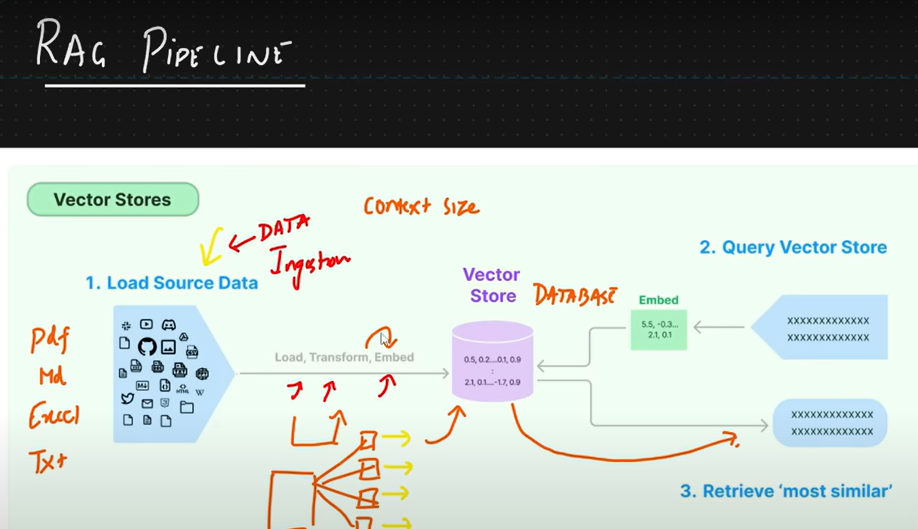

In [9]:

# Vector Embedding and Vector Store 
# Groq doesnn't support embedding model yet
from langchain_community.embeddings import HuggingFaceHubEmbeddings
from langchain_community.vectorstores import Chroma

embedding = HuggingFaceHubEmbeddings(
    repo_id="sentence-transformers/all-MiniLM-L6-v2",
    huggingfacehub_api_token="HUGGINGFACE_API_KEY"  
)
db = Chroma.from_documents(documents[:20], embedding=embedding)

# so with api I'm facing an inference client error, maybe because of huggingface version mismatch.
# So, let's use the local embedding model instead.
# it would need pip install sentence-transformers langchain

C:\Users\Admin\AppData\Local\Temp\ipykernel_13912\3339578027.py:6: LangChainDeprecationWarning: The class `HuggingFaceHubEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpointEmbeddings``.
  embedding = HuggingFaceHubEmbeddings(


AttributeError: 'InferenceClient' object has no attribute 'post'

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document

embedding = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

db = Chroma.from_documents(documents[:50], embedding=embedding)

In [14]:
# Vector database 
query = "Abstract of the paper Vending-Bench"

result=db.similarity_search(query, k=1)
print(result[0].page_content)

# Now, the author: '' , because the research paper doesn't have structured author metadata.

being unprepared when the capabilities emerge.
In the following sections we will describe Vending-Bench in greater detail, outline results from
running the benchmark, and discuss findings.
2 Method
2.1 Agent implementation
An LLM agent is a computer program that allows an LLM to autonomously take actions to complete
a task. The simplest implementation is a loop where the LLM repeatedly calls tools based on
2
